# Sales prediction using python 

# Importing libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# The Data

Let's start by reading in the  forecasting.csv file into a pandas dataframe.

In [3]:
# importing csv file 

df = pd.read_csv("forcasting.csv")

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 4)

In [6]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# Missing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# check for null values

pd.isnull(df).sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Preprocessing

In [9]:
# Apply standard scaler method  

from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
df['Sales'] = scaler.fit_transform(pd.DataFrame(df[['Sales']]))

In [12]:
df.head ()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,1.322319
1,44.5,39.3,45.1,-0.897515
2,17.2,45.9,69.3,-0.593948
3,151.5,41.3,58.5,0.259834
4,180.8,10.8,58.4,0.525455


In [13]:
df.tail ()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,-1.428757
196,94.2,4.9,8.1,-0.214489
197,177.0,9.3,6.4,-0.062706
198,283.6,42.0,66.2,1.967398
199,232.1,8.6,8.7,0.620320


In [14]:
df.duplicated().any()

False

# Exploratory Data Analysis

# Pairplot

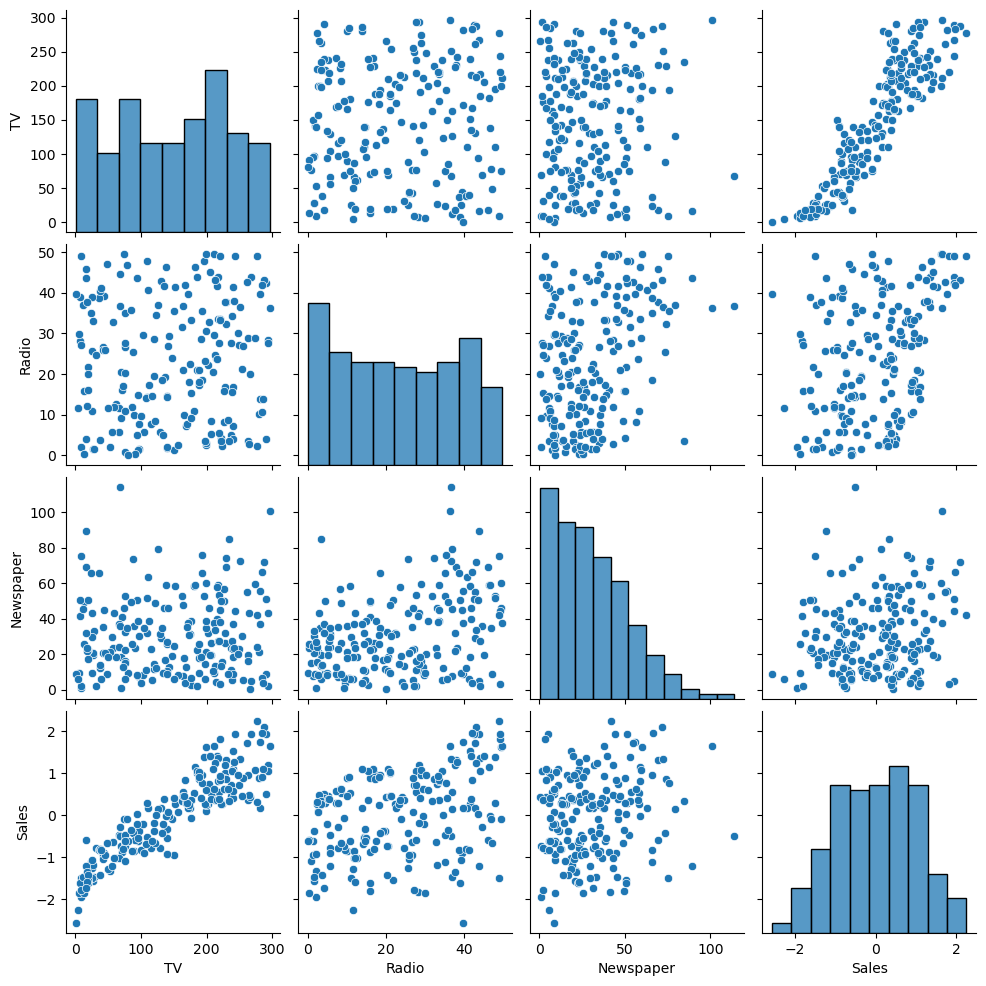

In [15]:
# plotting the pairplot
sns.pairplot(df)
plt.show()

# Heatmap

<Axes: >

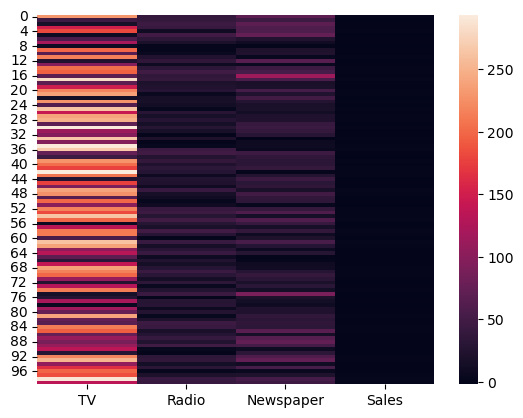

In [16]:
# plotting a heatmap 
x=df.head(100)
sns.heatmap(x)

# Countplot

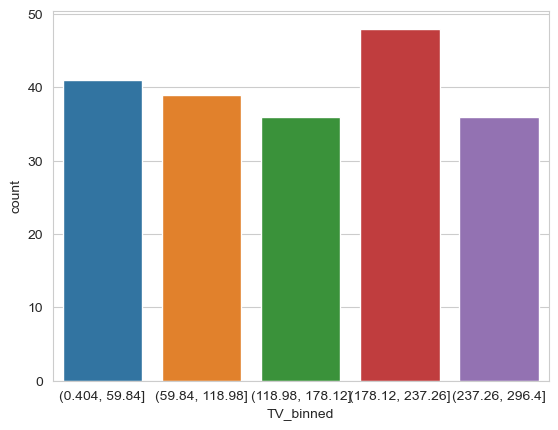

In [17]:
# plotting a countplot for TV.

sns.set_style('whitegrid')
bins = pd.cut(df['TV'],bins=5) #create 5  bins
df['TV_binned'] = bins
sns.countplot(x="TV_binned",data=df)
plt.show()

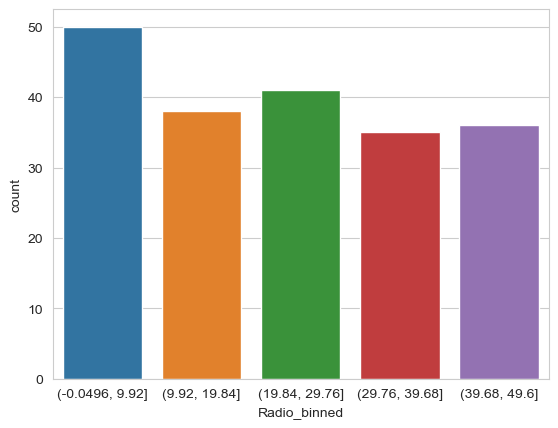

In [18]:
# plotting a countplot for Radio.

sns.set_style('whitegrid')
bins = pd.cut(df['Radio'],bins=5) #create 5  bins
df['Radio_binned'] = bins
sns.countplot(x="Radio_binned",data=df)
plt.show()

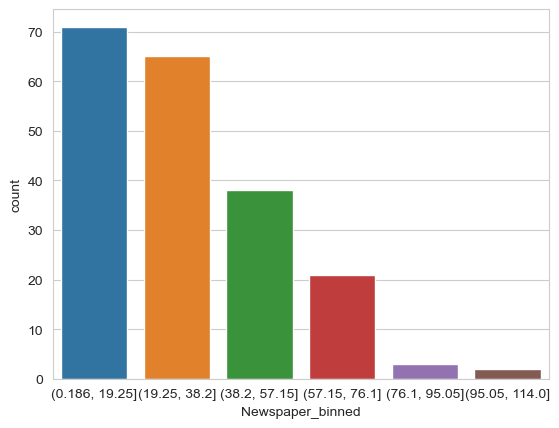

In [19]:
# plotting a countplot for Newspaper.

sns.set_style('whitegrid')
bins = pd.cut(df['Newspaper'],bins=6) #create 6  bins
df['Newspaper_binned'] = bins
sns.countplot(x="Newspaper_binned",data=df)
plt.show()

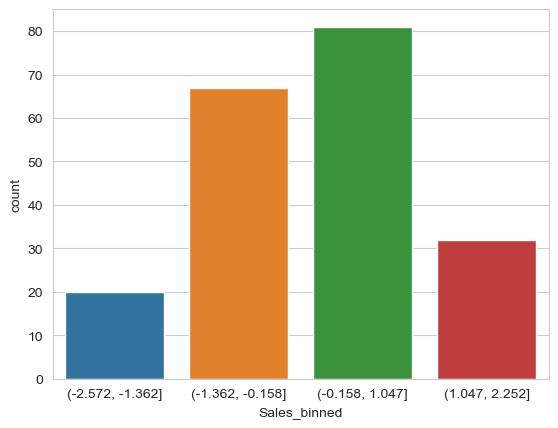

In [20]:
# plotting a countplot for Sales.

sns.set_style('whitegrid')
bins = pd.cut(df['Sales'],bins=4) #create 4  bins
df['Sales_binned'] = bins
sns.countplot(x="Sales_binned",data=df)
plt.show()

# Histogram

<Axes: ylabel='Frequency'>

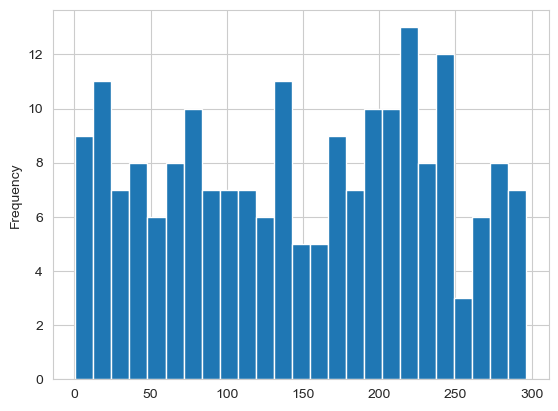

In [21]:
# plotting a histogram for tv

df['TV'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

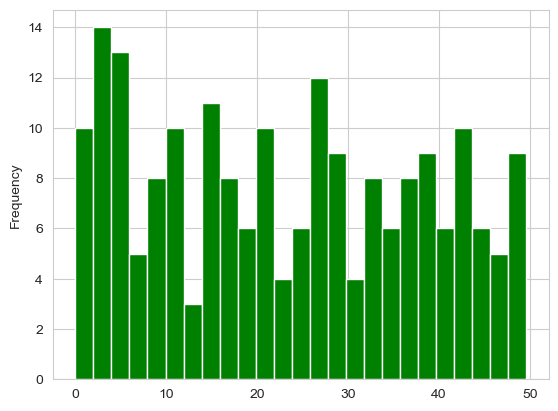

In [22]:
# plotting a histogram for Radio

df['Radio'].plot.hist(bins=25,color="green")

<Axes: ylabel='Frequency'>

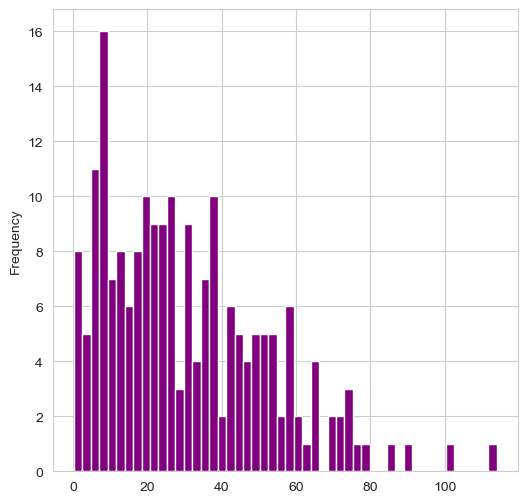

In [28]:
# plotting a histogram for newspapers

df['Newspaper'].plot.hist(bins=50,color="purple",xlabel="Newspaper",figsize=(6,6))

# Linear plot

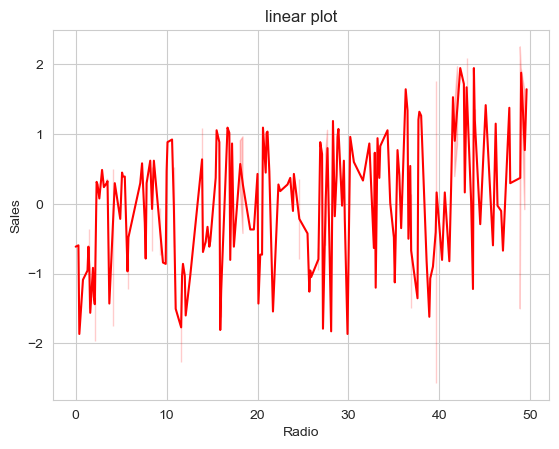

In [38]:
# plotting the linear plot between sales and radio

sns.lineplot(x="Radio",y="Sales",color="red",data=df)
plt.grid("darkgrid")
plt.title("linear plot")
plt.show()

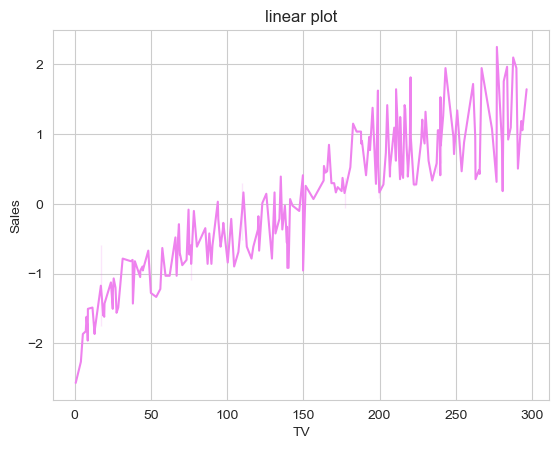

In [37]:
# plotting the linear plot between sales and tv

sns.lineplot(x="TV",y="Sales",color="violet",data=df)
plt.grid("darkgrid")
plt.title("linear plot")
plt.show()

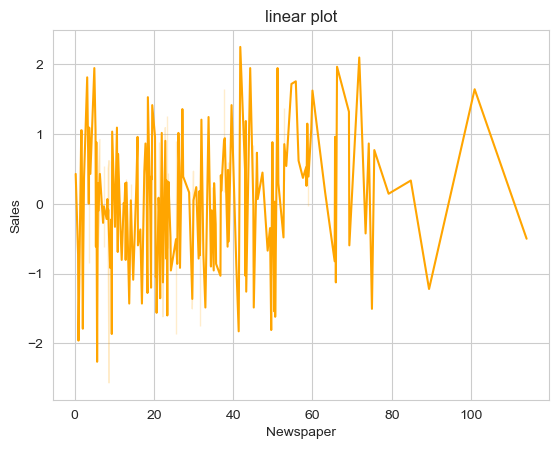

In [39]:
# plotting the linear plot between sales and newspaper

sns.lineplot(x="Newspaper",y="Sales",color="orange",data=df)
plt.grid("darkgrid")
plt.title("linear plot")
plt.show()

# Train and Test split method

In [49]:
# Using logistic regression for predicting the model.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['TV','Radio','Newspaper']],df[['Sales']],test_size=0.2)

In [54]:
x_train

,TV,Radio,Newspaper
198,283.6,42.0,66.2
21,237.4,5.1,23.5
96,197.6,3.5,5.9
167,206.8,5.2,19.4
23,228.3,16.9,26.2
...,...,...,...
2,17.2,45.9,69.3
148,38.0,40.3,11.9
128,220.3,49.0,3.2
92,217.7,33.5,59.0


In [55]:
x_test

,TV,Radio,Newspaper
33,265.6,20.0,0.3
135,48.3,47.0,8.5
141,193.7,35.4,75.6
152,197.6,23.3,14.2
85,193.2,18.4,65.7
37,74.7,49.4,45.7
5,8.7,48.9,75.0
1,44.5,39.3,45.1
187,191.1,28.7,18.2
197,177.0,9.3,6.4


In [56]:
y_train

,Sales
198,1.967398
21,0.449564
96,0.297780
167,0.392645
23,1.018752
...,...
2,-0.593948
148,-0.802650
128,1.815615
92,0.810049


In [57]:
y_test

,Sales
33,0.430591
135,-0.669839
141,0.772104
152,0.278807
85,0.961833
37,-0.081678
5,-1.504649
1,-0.897515
187,0.411618
197,-0.062706


# Linear regression 

In [95]:
from sklearn import linear_model

In [96]:
reg=linear_model.LinearRegression()

In [97]:
reg.fit(x_train,y_train)

LinearRegression()

In [98]:
reg.coef_

array([[0.01028386, 0.02070124, 0.00061903]])

In [99]:
reg.intercept_

array([-2.01702664])

In [102]:
reg.predict(x_train)

array([[ 1.80990788e+00],
       [ 5.44485214e-01],
       [ 9.11707394e-02],
       [ 2.29331213e-01],
       [ 6.96848145e-01],
       [ 4.36910489e-03],
       [-1.33670773e+00],
       [ 2.68954591e-01],
       [-1.30322220e-01],
       [ 1.01263547e+00],
       [-1.38884452e+00],
       [-1.01049405e+00],
       [ 5.70002016e-01],
       [-1.10417830e+00],
       [ 1.87521111e+00],
       [ 1.08965410e+00],
       [-5.72207882e-01],
       [ 4.32152583e-01],
       [ 3.48597331e-01],
       [ 1.17522804e+00],
       [ 1.50635856e-01],
       [-1.88449380e+00],
       [ 1.36354486e+00],
       [-1.53904602e+00],
       [-1.10484959e+00],
       [ 1.02019814e-01],
       [ 1.58794988e+00],
       [ 5.56760175e-01],
       [-5.35643570e-01],
       [ 1.05252435e+00],
       [ 1.05770117e+00],
       [-7.32156747e-01],
       [ 1.13813639e+00],
       [-1.01330760e+00],
       [-8.83244122e-01],
       [ 7.91455352e-01],
       [-2.73638448e-01],
       [-5.68642559e-01],
       [-3.6

In [103]:
reg.predict([[38.2,3.7,13.8]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.53904602]])

In [104]:
reg.predict([[94.2,4.9,8.1]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-0.9418368]])

In [105]:
reg.score(x_test,y_test)

0.8447554524900305

# Conclusion

The machine learning techniques used in this project, including data preprocessing, feature selection, and model training and evaluation, proved to be effective tools in the realm of sales prediction. Our model can serve as a foundation for further refinement and can be integrated into broader business intelligence systems.

In conclusion, this project highlights the importance of data-driven decision-making in optimizing advertising strategies and improving sales performance. By continuing to refine our models and incorporating additional data, businesses can further enhance their predictive accuracy and maintain a competitive edge in the market.